# Description

# Importing Essential Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print('Done')

Done


# Loading Dataset 

In [32]:
path = r'D:\Data_Projects\Password_Strength_Checker\data\raw\data.csv'
data = pd.read_csv(path, on_bad_lines='skip')

# Data Exploration and Analysis

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
strength,669640.0,0.990196,0.507948,0.0,1.0,1.0,1.0,2.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [35]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset')

There are 669640 rows and 2 columns in the dataset


## Missing Values

Let's look for rows with only one missing value.

In [36]:
missing_values = data.isnull().sum()
missing_values

password    1
strength    0
dtype: int64

OK! I have only one missing value why?

In [37]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


I decided to **drop** the row with the missing value because it constitutes a very small fraction of the dataset. Retaining this row would not provide significant insights and could potentially introduce noise into the analysis. By removing this single row, we ensure the integrity and completeness of our dataset, which is crucial for accurate data analysis and modeling.

In [38]:
data.dropna(inplace=True)

## EDA

First of all, I would like to figure out and check distribution 

**0** means: the password’s strength is **weak**;

**1** means: the password’s strength is **medium**;

**2** means: the password’s strength is **strong**;

In [39]:
data['strength'] = data['strength'].map({0: 'weak',
                                         1: 'medium',
                                         2: 'strong'})

data['strength'].value_counts()

strength
medium    496801
weak       89701
strong     83137
Name: count, dtype: int64

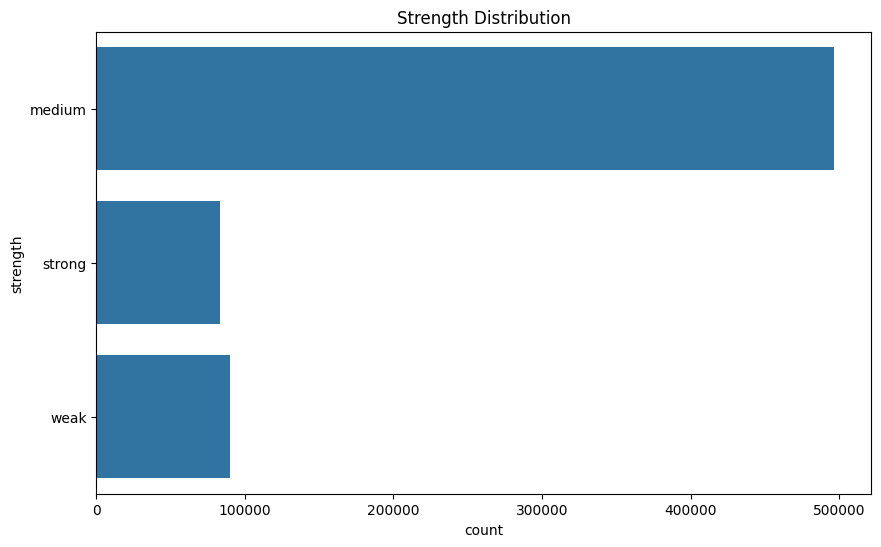

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data['strength'])
plt.title('Strength Distribution')
plt.show()

In [41]:
data['length'] = data['password'].apply(len)

In [48]:
mean_length = data.groupby('strength')['length'].mean()

for strength, mean_length in mean_length.items():
    print(f'The average Password length of {strength} passwords is {mean_length:.2f}')

The average Password length of medium passwords is 9.62
The average Password length of strong passwords is 15.93
The average Password length of weak passwords is 6.55


In [42]:
def analyze_password(password):
    has_number = any(char.isdigit() for char in password)
    has_letter = any(char.isalpha() for char in password)
    has_special = any(char for char in password if not char.isalnum())
    return has_number, has_letter, has_special

In [43]:
strength_analysis = {"weak" : {"total": 0, "has_number": 0, "has_letter": 0, "has_special": 0},
                     "medium" : {"total": 0, "has_number": 0, "has_letter": 0, "has_special": 0},
                     "strong" : {"total": 0, "has_number": 0, "has_letter": 0, "has_special": 0}}

In [46]:
for _, row in data.iterrows():
    password = str(row['password']).strip()
    strength = row['strength']
    
    has_number, has_letter, has_special = analyze_password(password)
    
    if strength in strength_analysis:
        strength_analysis[row['strength']]['total'] += 1
        strength_analysis[row['strength']]['has_number'] += int(has_number)
        strength_analysis[row['strength']]['has_letter'] += int(has_letter)
        strength_analysis[row['strength']]['has_special'] += int(has_special)

In [47]:
for strength, stats in strength_analysis.items():
    total = stats["total"]
    print(f"\nPassword Strength: {strength.capitalize()} - Total: {total}")
    if total > 0:
        print(f"  - Contains Numbers: {stats['has_number']} ({(stats['has_number'] / total) * 100:.2f}%)")
        print(f"  - Contains Letters: {stats['has_letter']} ({(stats['has_letter'] / total) * 100:.2f}%)")
        print(f"  - Contains Special Characters: {stats['has_special']} ({(stats['has_special'] / total) * 100:.2f}%)")


Password Strength: Weak - Total: 89701
  - Contains Numbers: 88299 (98.44%)
  - Contains Letters: 89193 (99.43%)
  - Contains Special Characters: 1458 (1.63%)

Password Strength: Medium - Total: 496801
  - Contains Numbers: 492939 (99.22%)
  - Contains Letters: 495226 (99.68%)
  - Contains Special Characters: 5909 (1.19%)

Password Strength: Strong - Total: 83137
  - Contains Numbers: 82989 (99.82%)
  - Contains Letters: 83137 (100.00%)
  - Contains Special Characters: 11310 (13.60%)
